<a href="https://colab.research.google.com/github/Nat-polska/Statistics/blob/main/Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # Linear Algebra
from scipy import stats
import pandas as pd # Data Processing
pd.options.display.float_format = '{:,.2f}'.format

import matplotlib.pyplot as plt # Visualization for Numpy and Pandas

In [4]:
# Read the CSV file
exp_data = pd.read_csv("correlation-26.04.csv", delimiter=";")
# exp_data = pd.read_csv("Book51.csv", delimiter=";")

# exp_data.head() 
exp_data

,Glucose,Urea,Albumin,Protein total,Bilirubin total,Cholesterin,Creatinine,Triglicerides,ALAT,ASAT,LDG,LF
0,5.20,6.70,43.00,66,1.90,1.11,42,0.70,39,188,2024,92.80
1,3.90,6.80,46.80,70,1.10,1.14,44,0.50,44,150,2091,68.90
2,5.20,5.80,41.40,67,0.80,1.41,39,0.50,54,232,1969,99.10
3,4.20,5.60,42.70,66,2.20,1.72,41,0.60,40,175,2037,70.50
4,7.40,6.50,41.50,68,1.60,1.67,37,0.50,43,196,2056,93.70
5,6.10,5.90,41.50,67,2.00,1.44,38,0.50,32,185,2052,59.90
6,5.10,6.50,47.10,72,1.90,1.02,46,0.40,40,158,1883,44.70
7,4.80,6.20,44.50,68,1.40,1.95,48,0.40,44,243,2008,67.90
8,5.10,7.10,42.00,67,1.70,1.74,47,0.50,59,210,1876,101.90
9,7.20,7.00,43.20,67,2.20,1.37,45,0.90,55,153,1992,79.40


In [16]:
exp_data.describe() # Stats for each column

,Glucose,Urea,Albumin,Protein total,Bilirubin total,Cholesterin,Creatinine,Triglicerides,ALAT,ASAT,LDG,LF
count,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00
mean,5.71,7.28,44.12,67.94,1.56,1.51,47.28,0.58,45.39,191.61,"1,927.72",83.14
std,1.22,1.23,2.33,2.58,0.44,0.27,6.27,0.15,8.68,39.53,277.74,21.16
min,3.90,5.60,41.00,63.00,0.80,1.02,37.00,0.40,28.00,143.00,873.00,44.70
25%,5.10,6.50,42.17,67.00,1.30,1.35,42.50,0.50,40.00,159.00,"1,895.75",68.75
50%,5.35,6.90,43.85,67.50,1.60,1.48,47.50,0.50,44.00,181.00,"2,000.00",84.05
75%,6.33,8.65,46.32,69.75,1.90,1.71,53.25,0.67,51.75,218.25,"2,055.00",97.75
max,8.40,9.30,48.00,73.00,2.20,1.95,56.00,0.90,59.00,279.00,"2,100.00",121.60


### Shapiro-Wilk test

In [6]:
data = {"Method": []}
data.update({v: [] for v in exp_data})

# data["Method"].append("Mean")
# for k in exp_data:
#   v = exp_data[k].mean()
#   data[k].append(v)

# data["Method"].append("Std")
# for k in exp_data:
#   v = exp_data[k].std()
#   data[k].append(v)

data["Method"].extend(["Shapiro-Wilk statistic", "Shapiro-Wilk pvalue"])
for k in exp_data:
  v = stats.shapiro(exp_data[k])
  data[k].append(v.statistic)
  data[k].append(v.pvalue)

pd.DataFrame(data)

,Method,Glucose,Urea,Albumin,Protein total,Bilirubin total,Cholesterin,Creatinine,Triglicerides,ALAT,ASAT,LDG,LF
0,Shapiro-Wilk statistic,0.95,0.89,0.91,0.97,0.95,0.96,0.94,0.85,0.97,0.92,0.54,0.98
1,Shapiro-Wilk pvalue,0.48,0.04,0.10,0.70,0.46,0.66,0.33,0.01,0.72,0.14,0.00,0.92


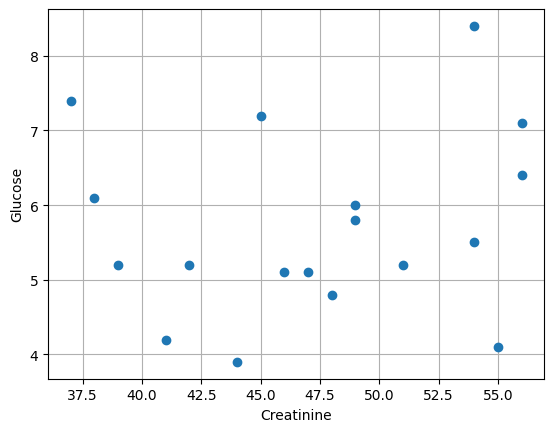

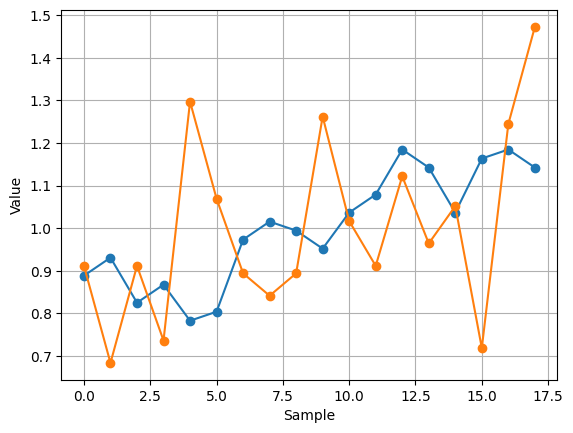

In [19]:
xl = 'Creatinine'
yl = 'Glucose'

plt.figure()
plt.plot(exp_data[xl], exp_data[yl], 'o')
# plt.plot(y, )
plt.grid()
plt.xlabel(xl)
plt.ylabel(yl)
plt.show()

plt.figure()
plt.plot(exp_data[xl] / exp_data[xl].mean(), 'o-')
plt.plot(exp_data[yl] / exp_data[yl].mean(), 'o-')
# plt.plot(y, )
plt.grid()
plt.xlabel("Sample")
plt.ylabel("Value")
plt.show()

### Pearson correlation coefficient and p-value for testing non-correlation

[https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)

In [17]:
res = stats.pearsonr(exp_data["Albumin"], exp_data["Protein total"])
res

PearsonRResult(statistic=0.6471875449977281, pvalue=0.003692469941132012)

In [ ]:
for k1 in exp_data:
  for k2 in exp_data:
    res = stats.pearsonr(exp_data[k1], exp_data[k2])
    print(f"{k1} - {k2}: {res}")

In [9]:
exp_data.corr(method='pearson')

,Glucose,Urea,Albumin,Protein total,Bilirubin total,Cholesterin,Creatinine,Triglicerides,ALAT,ASAT,LDG,LF
Glucose,1.00,0.31,0.10,0.42,0.14,0.06,0.15,0.28,-0.26,0.00,-0.27,0.22
Urea,0.31,1.00,0.43,0.18,-0.32,0.05,0.89,0.31,0.27,0.13,-0.38,0.55
Albumin,0.10,0.43,1.00,0.65,0.02,-0.23,0.53,0.24,-0.25,-0.21,-0.09,0.03
Protein total,0.42,0.18,0.65,1.00,-0.16,-0.10,0.23,-0.16,-0.30,0.10,-0.51,-0.18
Bilirubin total,0.14,-0.32,0.02,-0.16,1.00,-0.14,-0.31,0.35,-0.45,-0.42,0.37,-0.21
Cholesterin,0.06,0.05,-0.23,-0.10,-0.14,1.00,0.20,-0.11,0.15,0.56,-0.33,-0.05
Creatinine,0.15,0.89,0.53,0.23,-0.31,0.20,1.00,0.18,0.22,0.21,-0.41,0.29
Triglicerides,0.28,0.31,0.24,-0.16,0.35,-0.11,0.18,1.00,0.16,-0.45,0.19,0.41
ALAT,-0.26,0.27,-0.25,-0.30,-0.45,0.15,0.22,0.16,1.00,0.13,-0.13,0.42
ASAT,0.00,0.13,-0.21,0.10,-0.42,0.56,0.21,-0.45,0.13,1.00,-0.52,0.05


### Spearman correlation coefficient with associated p-value

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

In [10]:
exp_data.corr(method='spearman')

,Glucose,Urea,Albumin,Protein total,Bilirubin total,Cholesterin,Creatinine,Triglicerides,ALAT,ASAT,LDG,LF
Glucose,1.00,0.30,0.07,0.35,0.10,-0.04,0.12,0.30,-0.14,-0.01,-0.15,0.25
Urea,0.30,1.00,0.46,0.25,-0.31,-0.02,0.86,0.34,0.41,-0.07,-0.31,0.49
Albumin,0.07,0.46,1.00,0.70,0.08,-0.25,0.52,0.26,-0.23,-0.26,-0.07,0.02
Protein total,0.35,0.25,0.70,1.00,-0.21,-0.14,0.28,-0.24,-0.19,-0.04,-0.31,-0.08
Bilirubin total,0.10,-0.31,0.08,-0.21,1.00,-0.13,-0.36,0.37,-0.51,-0.30,0.25,-0.18
Cholesterin,-0.04,-0.02,-0.25,-0.14,-0.13,1.00,0.15,-0.09,0.17,0.48,0.03,-0.19
Creatinine,0.12,0.86,0.52,0.28,-0.36,0.15,1.00,0.15,0.28,0.13,-0.31,0.22
Triglicerides,0.30,0.34,0.26,-0.24,0.37,-0.09,0.15,1.00,-0.01,-0.40,0.27,0.38
ALAT,-0.14,0.41,-0.23,-0.19,-0.51,0.17,0.28,-0.01,1.00,0.06,-0.39,0.41
ASAT,-0.01,-0.07,-0.26,-0.04,-0.30,0.48,0.13,-0.40,0.06,1.00,-0.08,0.03


### Kendall Tau correlation coefficient

In [11]:
exp_data.corr(method='kendall')

,Glucose,Urea,Albumin,Protein total,Bilirubin total,Cholesterin,Creatinine,Triglicerides,ALAT,ASAT,LDG,LF
Glucose,1.00,0.21,0.03,0.29,0.08,-0.01,0.08,0.23,-0.12,-0.02,-0.10,0.18
Urea,0.21,1.00,0.35,0.18,-0.26,0.00,0.70,0.25,0.30,-0.05,-0.19,0.38
Albumin,0.03,0.35,1.00,0.49,0.07,-0.13,0.40,0.22,-0.17,-0.13,-0.07,0.01
Protein total,0.29,0.18,0.49,1.00,-0.15,-0.09,0.20,-0.19,-0.13,-0.03,-0.25,-0.04
Bilirubin total,0.08,-0.26,0.07,-0.15,1.00,-0.09,-0.30,0.29,-0.43,-0.23,0.17,-0.11
Cholesterin,-0.01,0.00,-0.13,-0.09,-0.09,1.00,0.09,-0.08,0.13,0.36,0.00,-0.15
Creatinine,0.08,0.70,0.40,0.20,-0.30,0.09,1.00,0.11,0.21,0.08,-0.25,0.16
Triglicerides,0.23,0.25,0.22,-0.19,0.29,-0.08,0.11,1.00,-0.03,-0.35,0.17,0.31
ALAT,-0.12,0.30,-0.17,-0.13,-0.43,0.13,0.21,-0.03,1.00,0.04,-0.24,0.31
ASAT,-0.02,-0.05,-0.13,-0.03,-0.23,0.36,0.08,-0.35,0.04,1.00,-0.07,0.05
